# Schémas numériques d'intégration

In [50]:
def euler(F, a, y0, b, n):
    """Retourne le tableau des approximations
    de y'=F(t,y) avec y(a)=y0 par la methode d'Euler avec un pas  de 1/n
    """
    les_yk = [y0]         # la liste des valeurs calculées
    les_tk = [a]                # le temps du dernier calcul
    t = a
    if n > 0:
        h = float(b-a) / n  # le pas
    dernier = y0          # la dernière valeur calculée
    for i in range(n):
        suivant = dernier + h*F(dernier, t) # le nouveau terme
        les_yk.append(suivant)  # on le place à la fin des valeurs calculées
        t = t+h                 # le nouveau temps
        les_tk.append(t)
        dernier = suivant       # et on met à jour le dernier terme calculé
    return les_tk, les_yk  # c'est fini

def heun(F, a, y0, b, n):
    """Retourne le tableau des approximations
    de y'=F(t,y) avec y(a)=y0 par la methode de Heun avec un pas  de 1/n
    """
    les_yk = [y0]         #la liste des valeurs calculées
    les_tk = [a]                # le temps du dernier calcul
    t = a                #le temps du dernier calcul
    if n > 0:
        h = float(b-a) / n  # le pas
    dernier = y0          # la dernière valeur calculée
    for i in range(n):
        eul = dernier + h*F(dernier, t) # ce que propose Euler
        suivant = dernier + h/2*(F(dernier, t) + F(eul, t+h)) #nouveau terme
        les_yk.append(suivant)  #on le place à la fin des valeurs calculées
        t = t+h                 #nouveau temps
        les_tk.append(t)
        dernier = suivant       #on met à jour le dernier terme calculé
    return les_tk, les_yk


def RK4(F, a, y0, b, n):
    """Retourne le tableau des approximations
    de y'=F(t,y) avec y(a)=y0 par la methode de RK4 avec un pas  de 1/n
    """
    les_yk = [y0]         # la liste des valeurs calculées
    les_tk = [a]                # le temps du dernier calcul
    t = a                # le temps du dernier calcul
    if n > 0:
        h = float(b-a) / n  # le pas
    dernier = y0          # la dernière valeur calculée
    for i in range(n): 
        alpha = dernier + h/2*F(dernier, t)
        beta = dernier + h/2*F(alpha, t+h/2)
        gamma = dernier + h*F(beta, t+h/2)
        suivant = dernier + h/6*(F(dernier, t) + 2*F(alpha, t+h/2) +
                        2*F(beta, t+h/2) + F(gamma,t+h)) # le nouveau terme
        les_yk.append(suivant)  # on le place à la fin des valeurs calculées
        t = t+h                 # le nouveau temps
        les_tk.append(t)
        dernier = suivant       # et on met à jour le dernier terme calculé
    return les_tk, les_yk


In [6]:
%matplotlib notebook

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation
from IPython.display import HTML

<IPython.core.display.Javascript object>


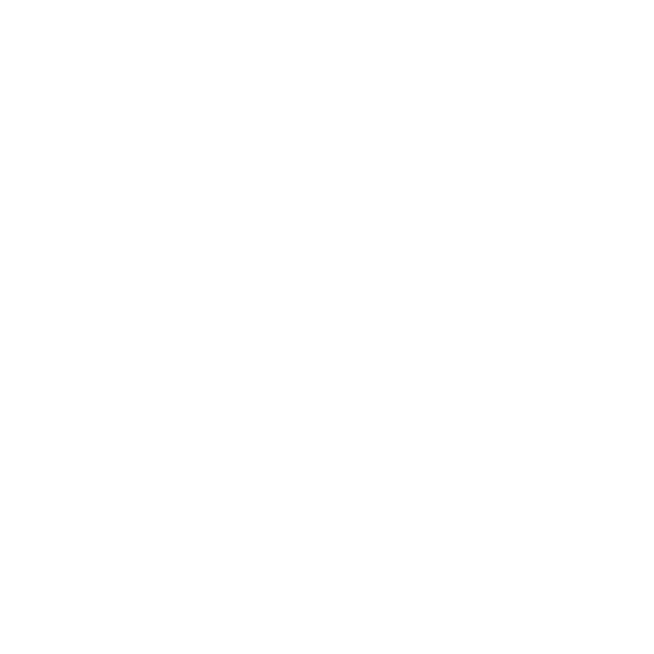

In [84]:
def animation(F, a, y0, b, nframe, equation, ymin, ymax):

   

    fig, ax1 = plt.subplots(1, 1,figsize=(6, 6))

    #données animation
    courbeEuler, = ax1.plot([],[],'.-',color="#1e7fcb", label='Euler')
    courbeHeun, = ax1.plot([],[],'.-',color="#189921", label='Heun')
    courbeRK4, = ax1.plot([],[],'.-',color="#ff007f", label='RK4')
    ann_list = []  #liste d'annotations

    #Positionnement des axes
    ax1.spines['right'].set_color('none')
    ax1.spines['top'].set_color('none')
    ax1.xaxis.set_ticks_position('bottom')
    ax1.spines['bottom'].set_position(('data',0))
    ax1.yaxis.set_ticks_position('left')
    ax1.spines['left'].set_position(('data',0))
    ax1.set_xlim((a-(b-a)/nframe, b + (b-a)/nframe))
    ax1.set_ylim((ymin, ymax))

    def init():
        nonlocal courbeEuler, courbeHeun, courbeRK4
        courbeSegments.set_data([], [])
        courbeHeun.set_data([], [])
        courbeRK4.set_data([], [])
        return (courbeSegments,) 

    def animate(i):
        nonlocal courbeEuler, courbeHeun, courbeRK4, ann_list
        for  note in ann_list:
            note.remove()
        ann_list[:] = []
        lx, ly = euler(F, a, y0, b, i)
        courbeEuler.set_data(lx, ly)
        for k in range(i + 1):
            ann =  ax1.annotate(r"$A_{%s}$"%k, xycoords='data', xy=(lx[k], ly[k]), xytext=(lx[k], ly[k]-0.01), color='blue')
            ann_list.append(ann)
        lx, ly = heun(F, a, y0, b, i)
        courbeHeun.set_data(lx, ly)    
        lx, ly = RK4(F, a, y0, b, i)
        courbeRK4.set_data(lx, ly)    
        ax1.set_title(f'Résolution approchée de {equation} sur [{a};{b}], {i} subdivisions')
        fig.savefig(f'{equation}-{i}-subdivisions.pdf')
        return (courbeSegments,)

    plt.legend(loc='best')
    plt.close ()
    return matplotlib.animation.FuncAnimation(fig, animate, frames=nframe,init_func=init,
                                              blit=False,interval=1000)
  
    


ani = animation(lambda y, t: y, 0, 1, 1, 10, "y'=y;y(0)=1", -1, 3)
HTML(ani.to_html5_video())
# l'un ou l'autre
#HTML(ani.to_jshtml())

<IPython.core.display.Javascript object>


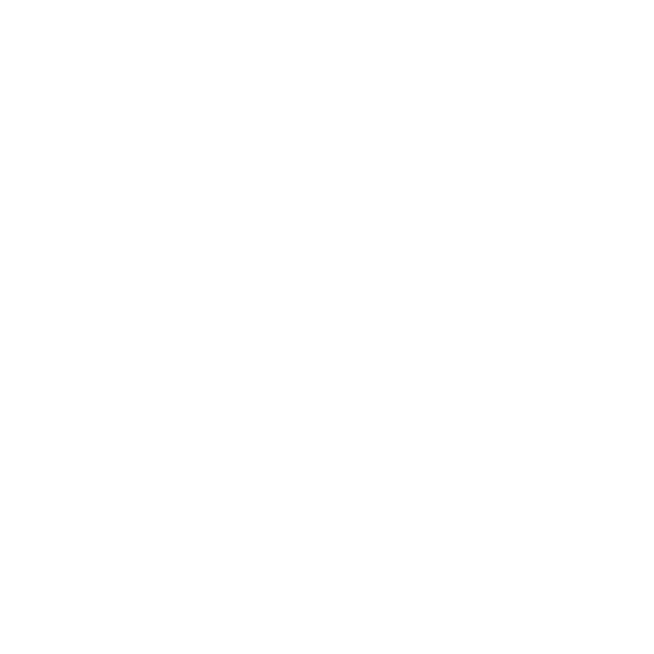

In [85]:
ani = animation(lambda y, t: y, 0, 1, 4, 30, "y'=y;y(0)=1", -1, 60)
HTML(ani.to_html5_video())